In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [6]:
df=pd.read_csv('chronic_kidney_disease.csv', names=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', \
                                                    'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class'],
               na_values='?')
df=df[['age','bp']]

In [7]:
replace_dict = {'bp': {np.nan: pd.to_numeric(df.bp, errors='coerce').mean()},
                'age': {np.nan: pd.to_numeric(df.age, errors='coerce').mean()}
               }
df.replace(replace_dict, inplace=True)

In [17]:
# composing data set
data=df.values

# obtaining the centers of the clusters
km = KMeans(n_clusters=4)
km.fit(data)

centroids = km.cluster_centers_

# points array will be used to reach the index easy
points = np.empty((0,len(data[0])), float)

# distances will be used to calculate outliers
distances = np.empty((0,len(data[0])), float)

# getting points and distances
for i, center_elem in enumerate(centroids):
    # cdist is used to calculate the distance between center and other points
    distances = np.append(distances, cdist([center_elem],data[clusters == i], 'euclidean')) 
    points = np.append(points, data[clusters == i], axis=0)

percentile = 95
# getting outliers whose distances are greater than some percentile
outliers = points[np.where(distances > np.percentile(distances, percentile))]

NameError: name 'clusters' is not defined

NameError: name 'outliers' is not defined

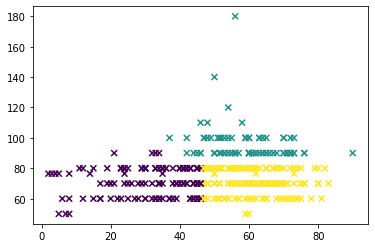

In [21]:
fig = plt.figure()

# change cluster to see difference
km = KMeans(n_clusters = 3)
# km = KMeans(n_clusters = 1)
clusters=km.fit_predict(data)

# plotting initial data
plt.scatter(*zip(*data),c=clusters,marker="x") 

# plotting red ovals around outlier points
plt.scatter(*zip(*outliers),marker="o",facecolor="None",edgecolor="r",s=70);

# plotting centers as blue dots
# change s=100 to see centroids
plt.scatter(*zip(*centroids),marker="o",facecolor="b",edgecolor="b",s=10);